In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [2]:
df = pd.read_csv('insurance.csv') #import dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#There was only 1 null data in the dataset. we got rid of it
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
correlation = df.corr() 
correlation

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


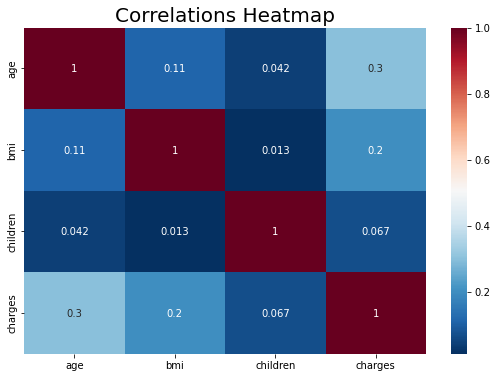

In [8]:
plt.figure(figsize=(9,6))
sns.heatmap(correlation,annot=True,cmap = "RdBu_r")
plt.title('Correlations Heatmap', fontsize=20)
plt.show()

In [9]:
def boxplot(x,y):
    sns.boxplot(x=x,y=y)

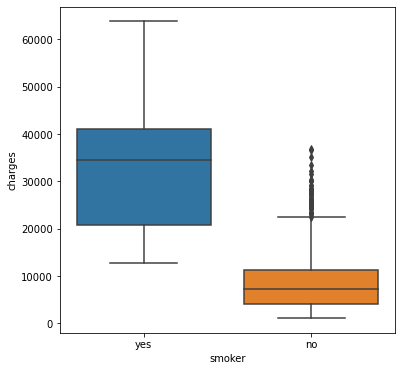

In [10]:
# Smokers spend more money on health care costs.
plt.figure(figsize=(6,6))
boxplot(df['smoker'],df['charges'])

In [11]:
def countplot(x):
    sns.countplot(x=x)

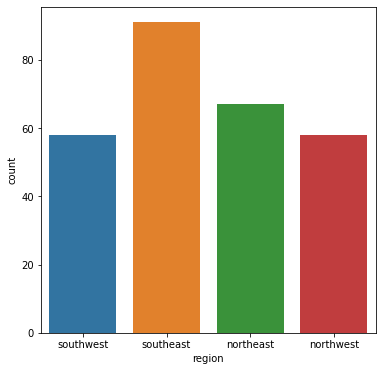

In [12]:
# the ratio of smokers by region
plt.figure(figsize=(6,6))
countplot(df.loc[df['smoker']=='yes']['region'])

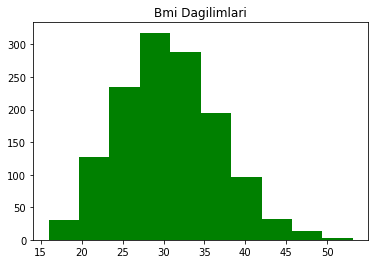

In [13]:
# Americans are mostly plumb 
plt.hist(df['bmi'],color = 'green')
plt.title("Bmi Dagilimlari")
plt.show()

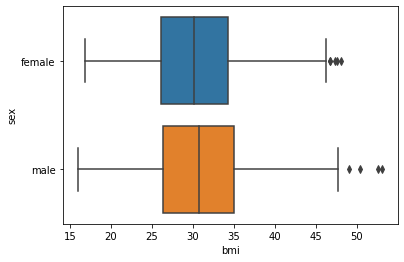

In [14]:
# There is no relation between bmi and sex 
boxplot(df['bmi'],df['sex'])

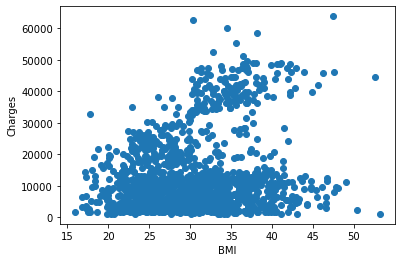

In [15]:
# Overweight people spend more money on medical charges (Bmi>30)
plt.scatter(df['bmi'],df['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

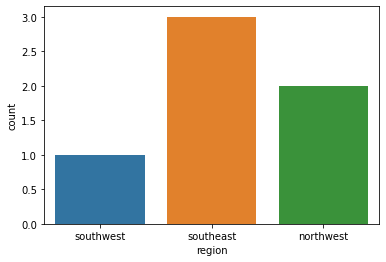

In [16]:
# number of children by region
countplot(df.loc[df.children.value_counts().index]['region'])
plt.show()

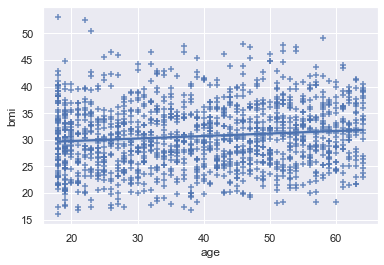

In [17]:
# There is no relation between bmi and age 
sns.set_theme(color_codes=True)
sns.regplot(x=df.age, y=df.bmi, data=df,marker="+")
plt.show()

C:\Users\dicle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

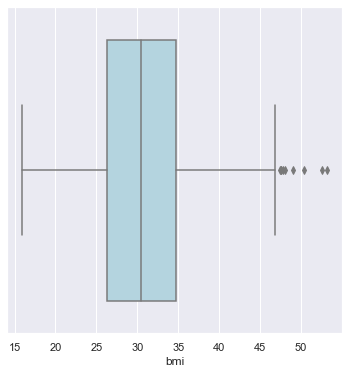

In [18]:
#Checking for the outliers
plt.figure(figsize= (6,6))
sns.boxplot(df.bmi, color='lightblue')

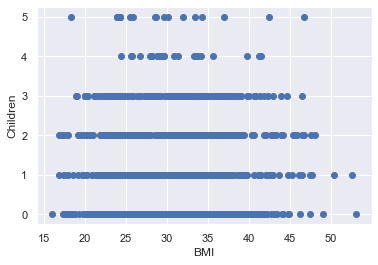

In [19]:
# There is no relation between bmi and children  
plt.scatter(df['bmi'],df['children'])
plt.xlabel("BMI")
plt.ylabel("Children")
plt.show()

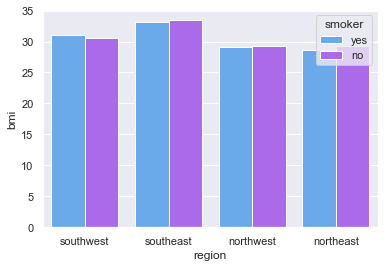

In [20]:
# relation between bmi and smoker by region 
sns.barplot(x='region',y='bmi',hue='smoker',data=df,palette='cool',ci=None)
plt.show()

In [21]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [22]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
# importing necesarry librarys
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# applying linear Regression 
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=24)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
# calculating score by cross validation
scores = cross_val_score(LinearRegression(), x_train, y_train, cv=10)
scores.mean()

0.7354018989313771

In [25]:
# normalization witg min-max scaler 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [26]:
# applying linear Regression 
x = scaled_df.drop(['charges'], axis = 1)
y = scaled_df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=24)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)

scores = cross_val_score(LinearRegression(), x_train, y_train, cv=10)
scores.mean()

0.7354018989313772

In [73]:
# applying Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures
x = scaled_df.drop(['charges', 'sex', 'region'], axis = 1)
y = scaled_df.charges
pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=24)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

scores = cross_val_score(LinearRegression(), x_train, y_train, cv=10)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print('score:',scores.mean())
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

score: 0.8312414823740907
Mean Absolute Error: 0.050515834314200786
Mean Squared Error: 0.0062907740457599885
Root Mean Squared Error: 0.07931439998991349


In [74]:
# applying Ridge Regression 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5, normalize=True)
ridge_reg.fit(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)
scores = cross_val_score(Ridge(), x_train, y_train, cv=5)

print(f"MSE with Pred : {scores.mean()}")
print(f"MSE with Ridge : {ridge_mse}")

MSE with Pred : 0.8311260336611213
MSE with Ridge : 0.00655056263991491


C:\Users\dicle\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
